# Importing Data

First, let's import and format the data in our notebook. We'll start with the data on electricity consumption.

This data originally was in the form of excel sheets (.xls), but using the pandas method ExcelFile caused some weird rounding issues on the datetimes, so I found it was easier to import the data from a CSV, then parse the datetime string manually to get datetime objects.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt

In [3]:
#Importing CSV into a df:
cons_2002 = pd.read_csv('./Data/Consumption/2002_ERCOT_Hourly_Load_Data.csv')
cons_2002.head()

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2002 1:00,8331.469266,1111.096549,1094.045496,995.298392,10336.30490,2165.007571,4793.193560,843.747177,29670.16291
1,1/1/2002 2:00,8107.805431,1091.481584,1083.517981,981.195477,10178.05274,2092.374118,4766.918187,835.488188,29136.83370
2,1/1/2002 3:00,7890.721717,1080.257616,1085.038740,971.305257,10100.88771,2042.080714,4702.918892,830.694878,28703.90552
3,1/1/2002 4:00,7799.817527,1079.726403,1093.381853,971.262963,10081.56511,2011.935791,4669.064391,835.068413,28541.82245
4,1/1/2002 5:00,7815.968171,1087.934961,1106.651296,982.535591,10192.21867,2002.487678,4695.011904,848.598209,28731.40648


The Hour_End column contains data in the form of strings, which means we can use datetime's strptime method to 
parse this into datetime objects. We use the pandas apply method on the 'Hour_End' column to create the 'Time' column.

In [4]:
cons_2002['Time'] = cons_2002['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
#Reordering the columns:
cons_2002 = cons_2002[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN',
                       'SOUTH_C','WEST','ERCOT']]
cons_2002.head()

,Hour_End,Time,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2002 1:00,2002-01-01 01:00:00,8331.469266,1111.096549,1094.045496,995.298392,10336.30490,2165.007571,4793.193560,843.747177,29670.16291
1,1/1/2002 2:00,2002-01-01 02:00:00,8107.805431,1091.481584,1083.517981,981.195477,10178.05274,2092.374118,4766.918187,835.488188,29136.83370
2,1/1/2002 3:00,2002-01-01 03:00:00,7890.721717,1080.257616,1085.038740,971.305257,10100.88771,2042.080714,4702.918892,830.694878,28703.90552
3,1/1/2002 4:00,2002-01-01 04:00:00,7799.817527,1079.726403,1093.381853,971.262963,10081.56511,2011.935791,4669.064391,835.068413,28541.82245
4,1/1/2002 5:00,2002-01-01 05:00:00,7815.968171,1087.934961,1106.651296,982.535591,10192.21867,2002.487678,4695.011904,848.598209,28731.40648


Just to check that this works, let's make sure we can plot this data:

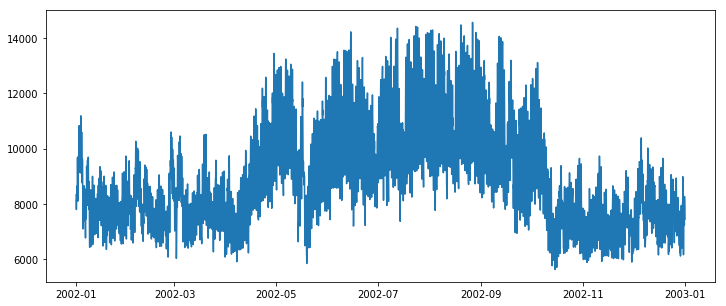

In [5]:
plt.rcParams['figure.figsize'] = (12,5) #Changing figure size
plt.plot(cons_2002['Time'],cons_2002['COAST'])

In [6]:
a = cons_2002['Time'][4593]
print(a)

2002-07-11 11:00:00


In [7]:
a.year

2002

In [8]:
#cons_2002['Time'].year == 2002

This looks good. Let's implement the same method for all of the data:

In [9]:
cons_2003 = pd.read_csv('./Data/Consumption/2003_ERCOT_Hourly_Load_Data.csv')
cons_2003['Time'] = cons_2003['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2003 = cons_2003[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [10]:
cons_2004 = pd.read_csv('./Data/Consumption/2004_ERCOT_Hourly_Load_Data.csv')
cons_2004['Time'] = cons_2004['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2004 = cons_2004[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [11]:
cons_2005 = pd.read_csv('./Data/Consumption/2005_ERCOT_Hourly_Load_Data.csv')
cons_2005['Time'] = cons_2005['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2005 = cons_2005[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [12]:
cons_2006 = pd.read_csv('./Data/Consumption/2006_ERCOT_Hourly_Load_Data.csv')
cons_2006['Time'] = cons_2006['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2006 = cons_2006[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [13]:
cons_2007 = pd.read_csv('./Data/Consumption/2007_ERCOT_Hourly_Load_Data.csv')
cons_2007['Time'] = cons_2007['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2007 = cons_2007[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [14]:
cons_2008 = pd.read_csv('./Data/Consumption/2008_ERCOT_Hourly_Load_Data.csv')
cons_2008['Time'] = cons_2008['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2008 = cons_2008[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [15]:
cons_2009 = pd.read_csv('./Data/Consumption/2009_ERCOT_Hourly_Load_Data.csv')
cons_2009['Time'] = cons_2009['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2009 = cons_2009[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [16]:
cons_2010 = pd.read_csv('./Data/Consumption/2010_ERCOT_Hourly_Load_Data.csv')
cons_2010['Time'] = cons_2010['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2010 = cons_2010[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [17]:
cons_2011 = pd.read_csv('./Data/Consumption/2011_ERCOT_Hourly_Load_Data.csv')
cons_2011['Time'] = cons_2011['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2011 = cons_2011[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [18]:
cons_2012 = pd.read_csv('./Data/Consumption/2012_ERCOT_Hourly_Load_Data.csv')
cons_2012['Time'] = cons_2012['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2012 = cons_2012[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [19]:
cons_2013 = pd.read_csv('./Data/Consumption/2013_ERCOT_Hourly_Load_Data.csv')
cons_2013['Time'] = cons_2013['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2013 = cons_2013[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [20]:
cons_2014 = pd.read_csv('./Data/Consumption/2014_ERCOT_Hourly_Load_Data.csv')
cons_2014['Time'] = cons_2014['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2014 = cons_2014[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [21]:
cons_2015 = pd.read_csv('./Data/Consumption/native_Load_2015.csv')
cons_2015['Time'] = cons_2015['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2015 = cons_2015[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [22]:
cons_2016 = pd.read_csv('./Data/Consumption/native_Load_2016.csv')
cons_2016['Time'] = cons_2016['Hour_End'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2016 = cons_2016[['Hour_End','Time','COAST','EAST','FAR_WEST','NORTH','NORTH_C','SOUTHERN','SOUTH_C','WEST','ERCOT']]

In [23]:
cons_2017 = pd.read_csv('./Data/Consumption/native_Load_2017.csv')
cons_2017['Time'] = cons_2017['Hour Ending'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))
cons_2017 = cons_2017[['Hour Ending','Time','COAST','EAST','FWEST','NORTH','NCENT','SOUTH','SCENT','WEST','ERCOT']]

In [24]:
#The column names in the 2017 file are slightly different that for all the others, so let's rename the columns to 
#match the other files:
cons_2017.columns = cons_2016.columns.tolist()

Note for repeatability: The original Excel file from ERCOT for the 2017 data lists the midnight dates in the form '1/1/2017 24:00' instead of '1/2/2017 00:00', which datetime does not recognize as a proper date. To resolve this, I just use Excel's fill handle to autofill all of the date data based on the first two cells, which puts the midnight data in the correct form and leaves all of the other dates alone. Then I could import the data and use datetime to parse it.

In [25]:
#Combining all of these dataframes into a single dataframe:
c_list = [cons_2002, cons_2003, cons_2004, cons_2005, cons_2006, cons_2007, cons_2008, cons_2009, cons_2010, 
          cons_2011, cons_2012, cons_2013, cons_2014, cons_2015, cons_2016, cons_2017]
cons_full = pd.concat(c_list, join = 'outer', sort = False)

In [26]:
cons_full.head()

,Hour_End,Time,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2002 1:00,2002-01-01 01:00:00,8331.47,1111.1,1094.05,995.298,10336.3,2165.01,4793.19,843.747,29670.2
1,1/1/2002 2:00,2002-01-01 02:00:00,8107.81,1091.48,1083.52,981.195,10178.1,2092.37,4766.92,835.488,29136.8
2,1/1/2002 3:00,2002-01-01 03:00:00,7890.72,1080.26,1085.04,971.305,10100.9,2042.08,4702.92,830.695,28703.9
3,1/1/2002 4:00,2002-01-01 04:00:00,7799.82,1079.73,1093.38,971.263,10081.6,2011.94,4669.06,835.068,28541.8
4,1/1/2002 5:00,2002-01-01 05:00:00,7815.97,1087.93,1106.65,982.536,10192.2,2002.49,4695.01,848.598,28731.4


In [27]:
len(cons_full)

140256

In [28]:
for i in c_list:
    print(len(i))

8760
8760
8784
8760
8760
8760
8784
8760
8760
8760
8784
8760
8760
8760
8784
8760


From this, we see that some of the cons files have a different number of entries. Let's try to figure out why this is the case.

In [30]:
cons_2017

,Hour_End,Time,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,1/1/2017 1:00,2017-01-01 01:00:00,"8,791.79",896.75,"1,997.72",683.62,"9,239.15","2,366.63","4,490.78",954.19,"29,420.64"
1,1/1/2017 2:00,2017-01-01 02:00:00,"8,569.71",865.93,"1,997.78",677.97,"9,105.00","2,332.74","4,370.66",951.03,"28,870.81"
2,1/1/2017 3:00,2017-01-01 03:00:00,"8,326.43",839.05,"1,993.70",672,"8,988.04","2,237.51","4,210.65",944.36,"28,211.72"
3,1/1/2017 4:00,2017-01-01 04:00:00,"8,137.50",822.83,"1,995.54",675.27,"8,979.15","2,178.10","4,088.71",943.19,"27,820.29"
4,1/1/2017 5:00,2017-01-01 05:00:00,"8,011.87",814.02,"1,995.25",663.62,"9,033.55","2,133.95","4,021.76",954.94,"27,628.96"
5,1/1/2017 6:00,2017-01-01 06:00:00,"7,978.10",823.42,"1,981.35",669.75,"9,195.16","2,122.02","4,045.30",972.56,"27,787.66"
6,1/1/2017 7:00,2017-01-01 07:00:00,"8,057.12",844.95,"1,983.28",684.49,"9,507.35","2,146.56","4,156.67",993.64,"28,374.06"
7,1/1/2017 8:00,2017-01-01 08:00:00,"8,125.76",874.58,"2,015.31",710.23,"9,881.60","2,137.65","4,286.08","1,019.34","29,050.55"
8,1/1/2017 9:00,2017-01-01 09:00:00,"8,289.16",919.26,"2,008.25",728.17,"10,215.31","2,185.33","4,441.36","1,033.34","29,820.17"
9,1/1/2017 10:00,2017-01-01 10:00:00,"8,646.52",956.21,"2,024.82",727.77,"10,566.14","2,305.30","4,604.24","1,017.39","30,848.39"


In [31]:
cons_2017.to_csv('cons_2017.csv')